# Basic Simple 1 layer Artificial Neural Network and Training the model on GPU(if available)

Here, we will be working with a simple regression problem containing a single feature and a single label.

## In this code, we will be training on the GPU contains a lot of ALUs, So,training on Gpu is faster.

In [0]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
# To check if cuda is available or not 
torch.cuda.is_available()

True

In [3]:
# Lets check if Gpu/Cpu is working
a = torch.tensor([1,2,3])
a.device

device(type='cpu')

In [4]:
# Lets choose GPU as gpu is available on our system
a = torch.tensor([1,2,3]).cuda()
a.device

device(type='cuda', index=0)

- Above, we have seen that GPU should be used for larger data as it is vary fast as compared to CPU. 
- Moreover, if we want to use gpu in our code then we simply have to check whether it is available or not.
- If it is available, then the complete code can be shifted to the GPU by using cuda() function.

## Lets train a simple regression problem on GPU for complete understanding.

## 1) Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

## 2) Creating a simple dataset

In [0]:
# Feature
X = torch.linspace(1,1000,1000).reshape(-1,1)

#adding some noise to label
noise = np.random.randint(-5,5,size = 1000).reshape(-1,1)
y = 5*X + noise


### 2.1) Sending everything to cuda

In [7]:
X = X.cuda()
y = y.cuda()

len(X), len(y), type(X), type(y), X.shape, y.shape

(1000,
 1000,
 torch.Tensor,
 torch.Tensor,
 torch.Size([1000, 1]),
 torch.Size([1000, 1]))

## 3) Dividing the data into train and test data

In [8]:
# we will be using our 90% data as train set and the remaining data as test set
train_size = 0.9 
s = int(len(X)*0.9)
X_train = X[:s]
X_test = X[s:]
y_train = y[:s]
y_test = y[s:]

len(X_train), len(X_test), len(y_train), len(y_test)

(900, 100, 900, 100)

## 4) Defining the ANN model

In [0]:
class ANN(nn.Module):
  def __init__(self,in_features,out_features,hidden_dim):
    super().__init__()

    self.in_features = in_features
    self.out_features = out_features
    
    # Our model :   Input layer ----> Output

    self.fc1 = nn.Linear(self.in_features,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,self.out_features)

  def forward(self,X):
    X = self.fc1(X)
    y_pred = self.fc2(X)
    return y_pred
    

## 5) Instantiating the model and shifting it to cuda

In [0]:
model = ANN(1,1,256)
gpu_model = model.cuda()  #shifting everything to cuda

## 6) Training the model


 Defining the loss function and the optimizer

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [13]:
# Training
import time
epochs = 1000
losses = []
start = time.time()

for i in range(epochs):
  i+=1

  #Predicting the output by GPU model
  y_pred = gpu_model.forward(X_train)

  #calculating the loss
  loss = criterion(y_train,y_pred)

  losses.append(loss)

  if i%100 == 0:
    print(f'Epoch : {i}    Loss : {loss.item()}')

  # Making the gradients zero for backward propagation
  optimizer.zero_grad()

  # Backward Propagation
  loss.backward()
  
  optimizer.step()

print(f'Total Time Taken : {time.time() - start}')

Epoch : 100    Loss : 10.151750240584576
Epoch : 200    Loss : 8.603925081145166
Epoch : 300    Loss : 8.599301297444434
Epoch : 400    Loss : 8.598555799416289
Epoch : 500    Loss : 8.597654133960711
Epoch : 600    Loss : 8.596733868775367
Epoch : 700    Loss : 8.595638967824314
Epoch : 800    Loss : 8.594439600305547
Epoch : 900    Loss : 8.593136252451325
Epoch : 1000    Loss : 8.591808041591257
Total Time Taken : 1.6404380798339844


## 7) Plotting the curve between loss and epochs

Text(0, 0.5, 'Losses')

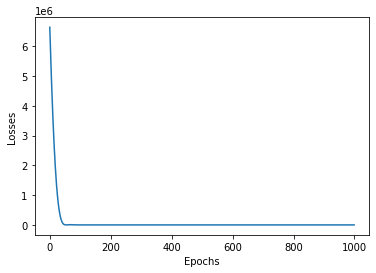

In [14]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')

## 8) Predicting the output for test data

In [15]:
print(model.parameters())
print(gpu_model.parameters())

<generator object Module.parameters at 0x7fd2b1c6c0f8>
<generator object Module.parameters at 0x7fd2b1c6c0f8>


In [16]:
#Predicting the output
with torch.no_grad():
  y_p = gpu_model(X_test)

  loss = criterion(y_test,y_p)

  print(f'Loss : {loss.item()}')

Loss : 9.350973156296313


- To plot a graph between the predicted and the test data, we can't directly plot the graphs as GPU does not support Numpy.
- So,first we have to come out of gpu to plot the graph using cpu() and then convert the pytorch tensor to numpy and after that we can plot it.

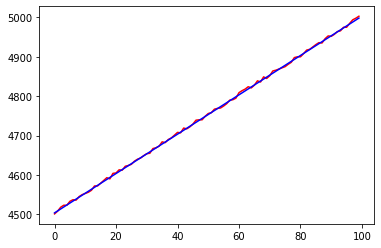

In [17]:
plt.plot(y_test.cpu().numpy(),'r')
plt.plot(y_p.cpu().numpy(),'b')

In [18]:
df = pd.DataFrame(y_test.cpu().numpy().reshape(1,-1).flatten())
df["Predicted"] = y_p.cpu().numpy().reshape(1,-1).flatten()
df.rename(columns= {0:'Actual'},inplace = True)
df

,Actual,Predicted
0,4501.0,4503.610352
1,4508.0,4508.607910
2,4518.0,4513.605469
3,4523.0,4518.603027
4,4523.0,4523.600586
...,...,...
95,4975.0,4978.374023
96,4985.0,4983.371094
97,4994.0,4988.369141
98,4998.0,4993.366211
